# Number of Tickets sold per genre vs Income

How does the economy impact the popularity of movie generes?

In [1]:
import sys
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.special import comb
from scipy.stats import spearmanr

data = pd.read_csv ('data.csv', index_col=0)

## Visual display of Data

The following scatterplot shows the percent change in income in each year. This scatterplot allows us to see the trend of income over our time frame of interest (1995 to 2018).

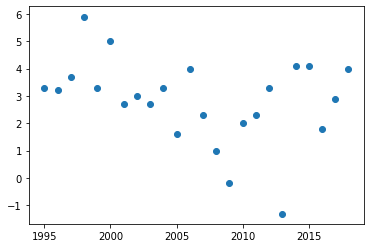

In [72]:
income_raw = pd.DataFrame(data["% Income Annual Change, Chained Dollars"])
income= np.zeros(24)
x = 0
for value in income_raw.iterrows():
    income[x] = income_raw.iloc(0)[x]
    x+=1

plt.scatter(range(1995,2019),income)

## Model of relationships

## Evaluation of Significance